<a href="https://colab.research.google.com/github/Savvythelegend/MLE/blob/main/projects/phishing_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing Website Classification Project

## 1. Objective
The primary objective of this project is to develop and evaluate various machine learning models capable of classifying websites as either legitimate or phishing based on a given dataset. We will explore different algorithms to identify the most effective approach

## 2. Loading Data:

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive

# Local file path
file_path = '/content/Phishing Data - Phishing Data.csv'

# If the file is not in Colab, mount Google Drive
if not os.path.exists(file_path):
    print("Local file not found, mounting Google Drive...")
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/Phishing Data - Phishing Data.csv'

# Load dataset
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
display(df.head())

Local file not found, mounting Google Drive...
Mounted at /content/drive
Dataset loaded successfully!
Shape: (2456, 31)


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


## 3. Data Preprocessing & EDA

In [3]:
df.shape

(2456, 31)

In [4]:
for col in df.columns:
  print(col)

having_IP_Address
URL_Length
Shortining_Service
having_At_Symbol
double_slash_redirecting
Prefix_Suffix
having_Sub_Domain
SSLfinal_State
Domain_registeration_length
Favicon
port
HTTPS_token
Request_URL
URL_of_Anchor
Links_in_tags
SFH
Submitting_to_email
Abnormal_URL
Redirect
on_mouseover
RightClick
popUpWidnow
Iframe
age_of_domain
DNSRecord
web_traffic
Page_Rank
Google_Index
Links_pointing_to_page
Statistical_report
Result


In [5]:
df.dropna(subset=['Result'], inplace=True)
print("Missing values per column after dropping rows with missing Result:")
print(df.isnull().sum())

Missing values per column after dropping rows with missing Result:
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_poi

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

### Exploratory data analysis

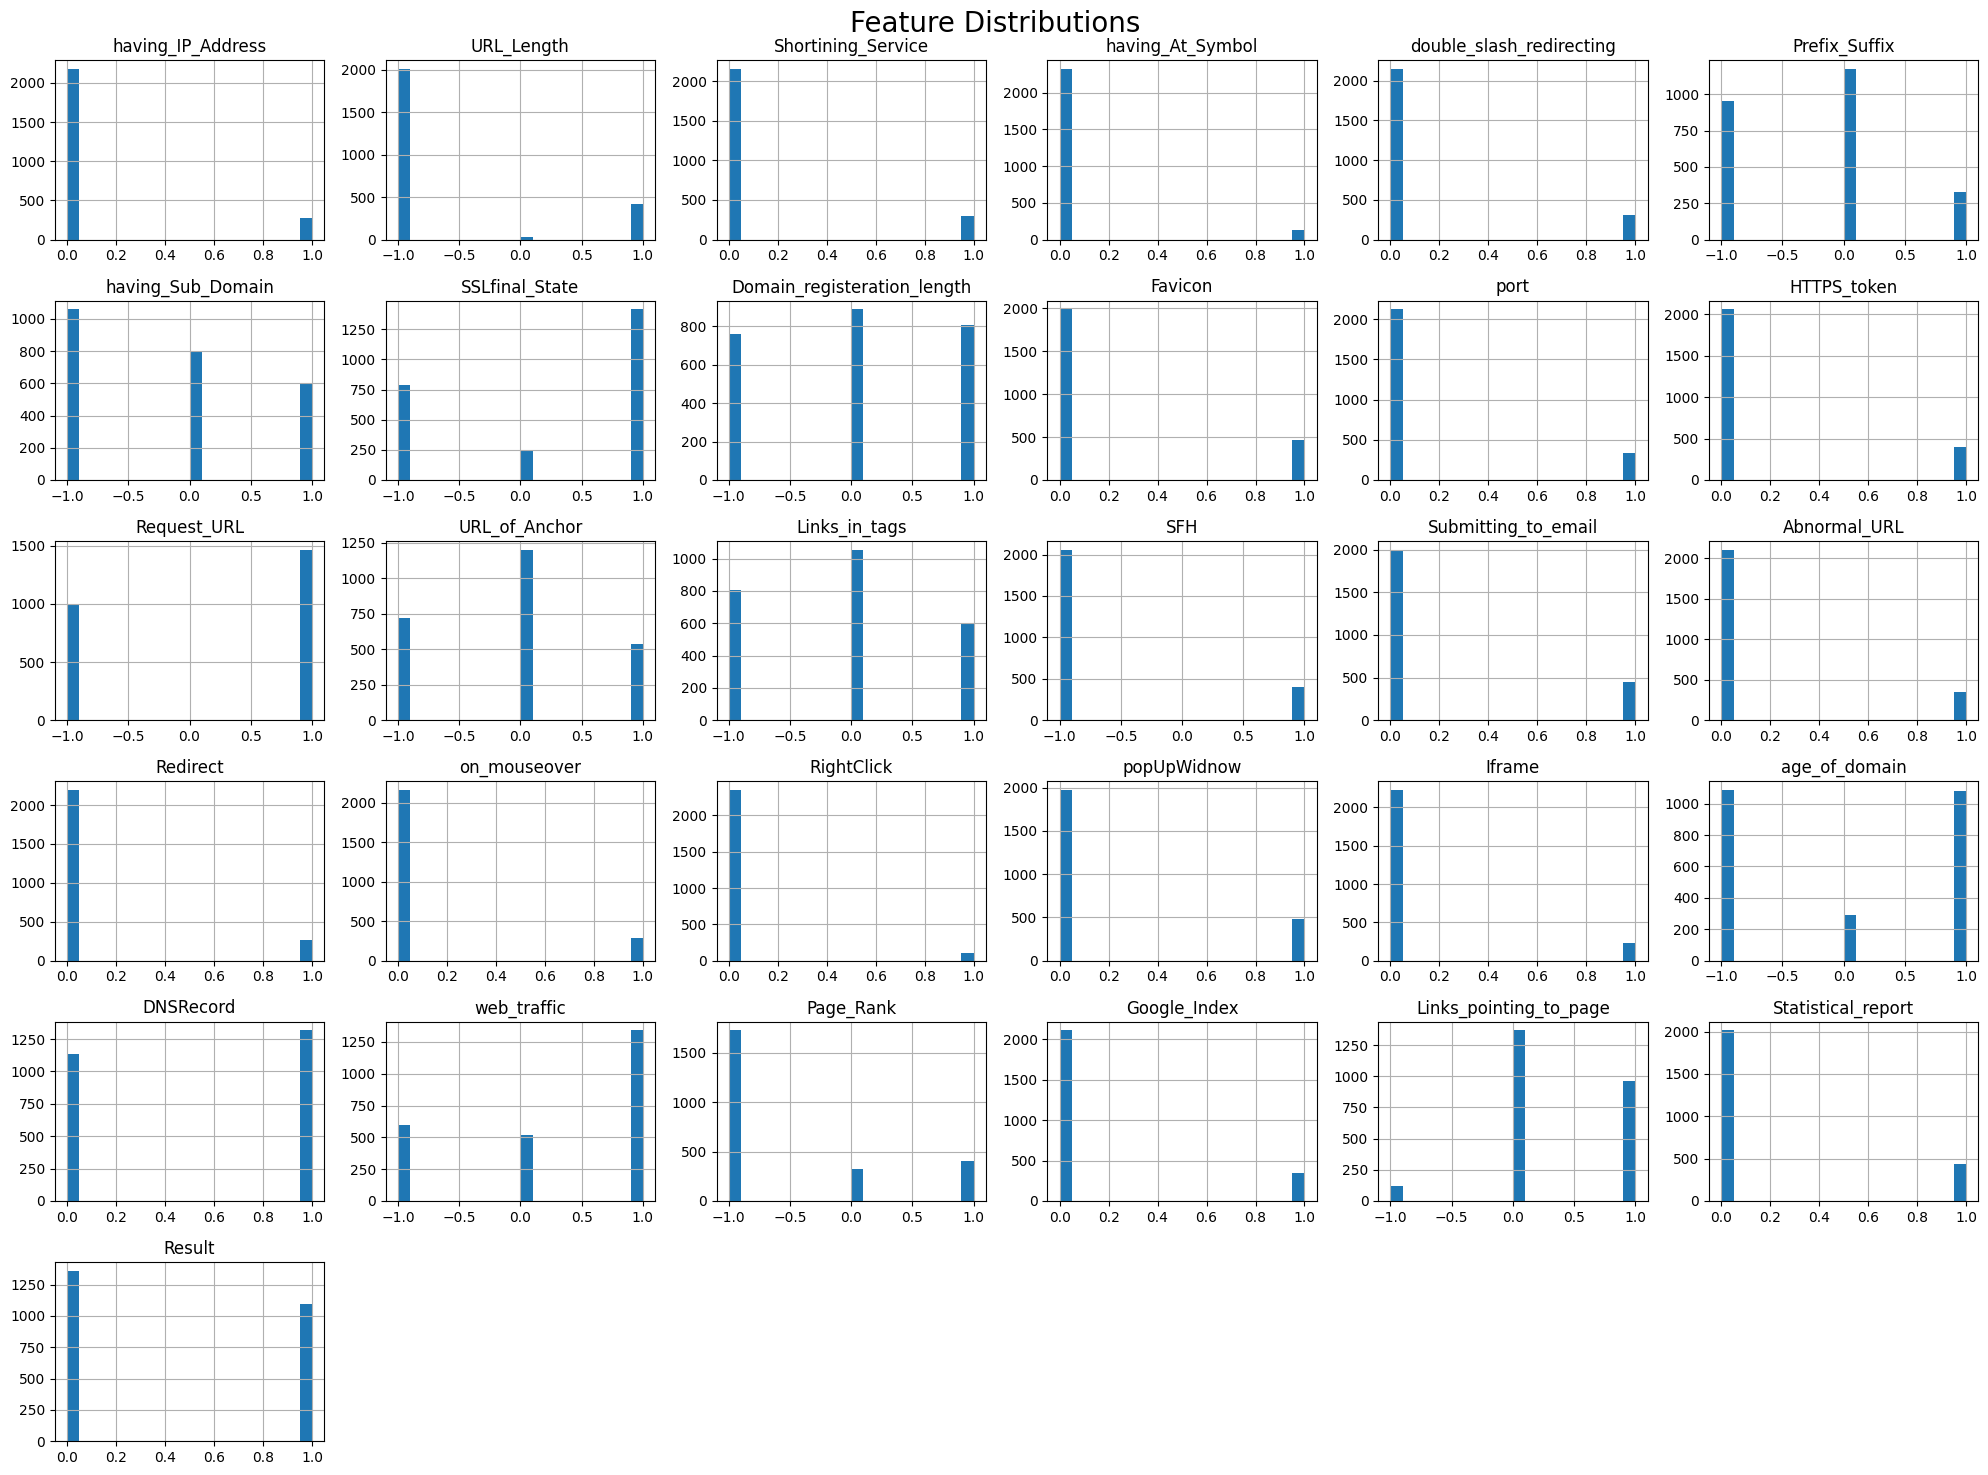

In [7]:
#plotting the data distribution
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout()
plt.show()

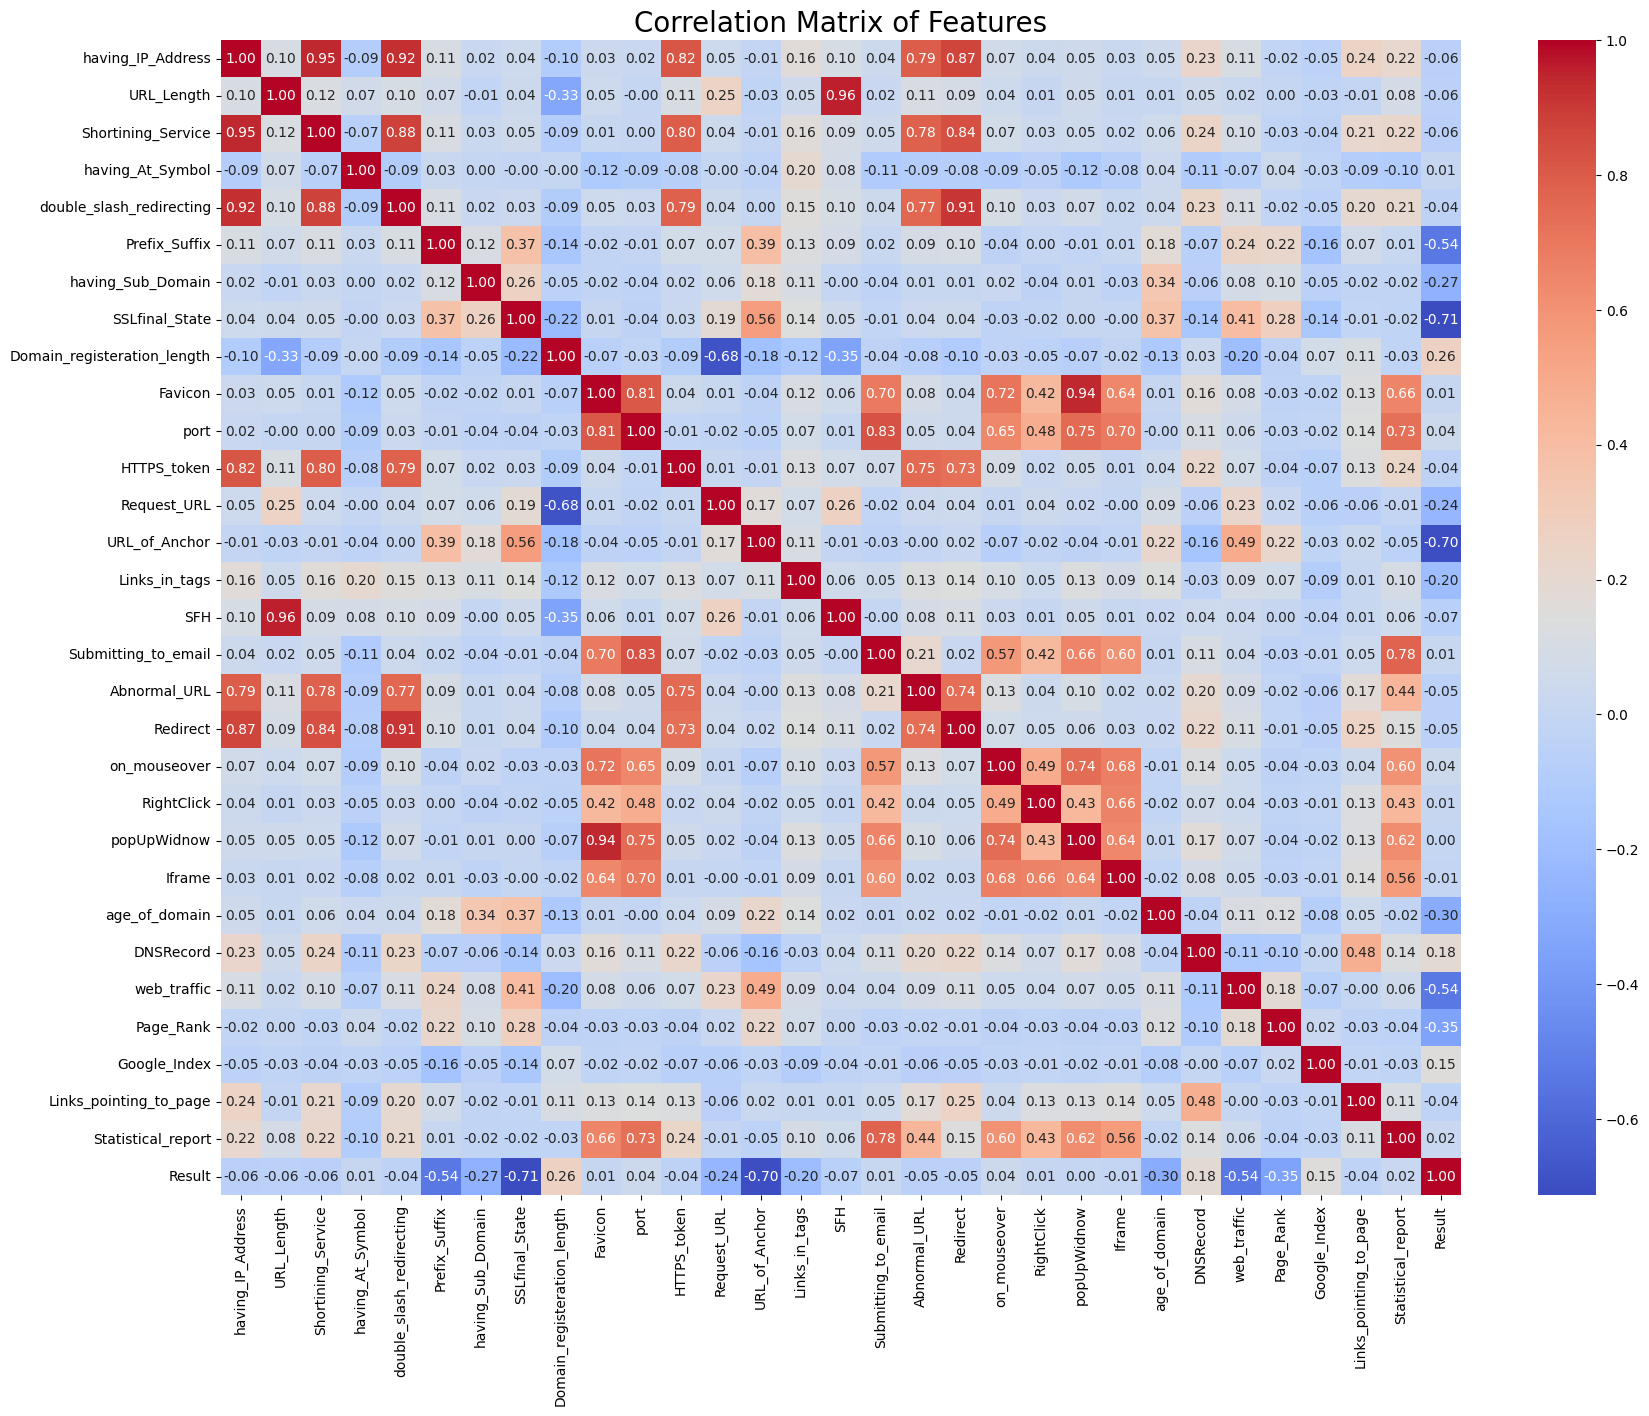

In [8]:
#Correlation heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=20)
plt.show()

#### EDA Result
- Classes are fairly balanced.
- Features show varying correlation with the target.

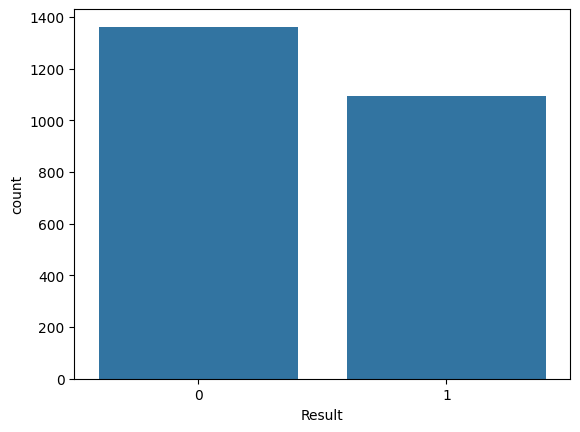

In [9]:
df['Result'].value_counts()
sns.countplot(x='Result', data=df)
plt.show()

## 4. Splitting the Data
- Features already numeric, so no encoding needed.
- Train-test split with stratification to maintain class balance.

In [10]:
y = df['Result']
X = df.drop('Result',axis=1)
X.shape, y.shape

((2456, 30), (2456,))

In [11]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((1964, 30), (492, 30))

## 5. Machine Learning Models & Training

This is a supervised machine learning task, specifically a classification problem, as the goal is to classify a URL as either phishing (1) or legitimate (0). The following supervised machine learning models will be used to train the dataset:
*   Decision Tree
*   Random Forest
*   Support Vector Machines
*   XGBoost
*   MLP (Multilayer Perceptrons)


In [12]:
#importing packages
from sklearn.metrics import accuracy_score

### Model Evaluation Setup

*A helper function `storeResults` is defined to store the model name and its training and testing accuracies in lists. These lists will be used later to create a comparison table of the models.*

In [13]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### Decision Tree Classifier

*The Decision Tree Classifier is a simple yet powerful model that makes decisions based on a tree-like structure*

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth= 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [15]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#### Performance Evaluation:

In [16]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.947
Decision Tree: Accuracy on test Data: 0.943


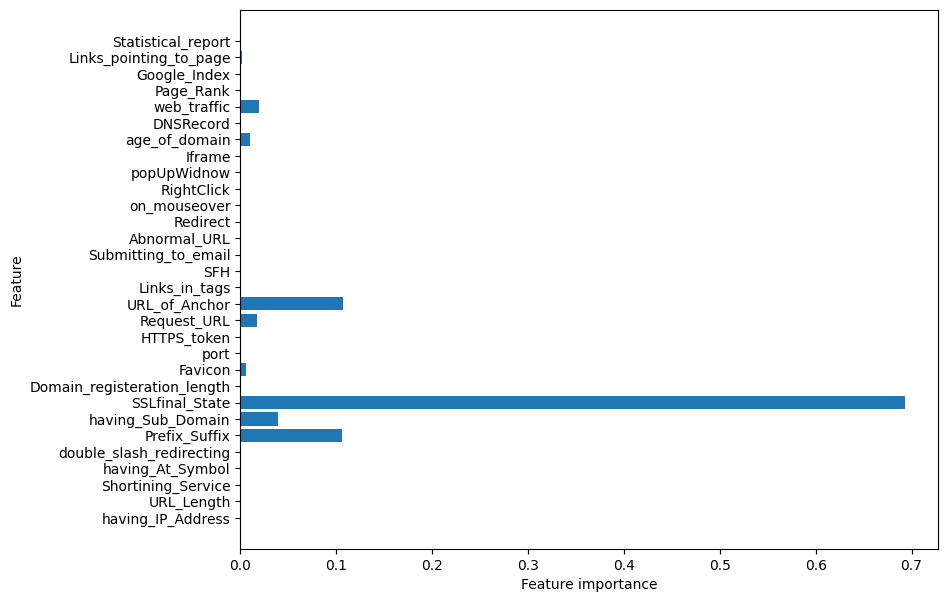

In [17]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [18]:
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### Random Forest Classifier

*The Random Forest Classifier is an ensemble model that combines multiple decision trees to improve prediction accuracy and reduce overfitting.*.

In [19]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [20]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

####Performance Evaluation

In [21]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.952
Random forest: Accuracy on test Data: 0.957


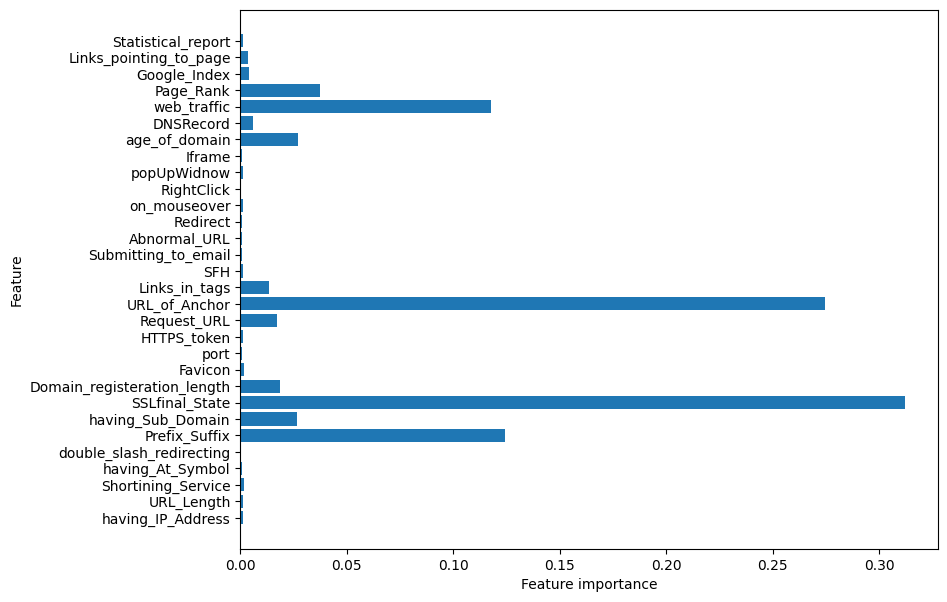

In [22]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [23]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### Multilayer Perceptrons (MLP) Classifier

*The Multilayer Perceptron (MLP) is a type of artificial neural network. We instantiate an `MLPClassifier` with a specified alpha (L2 regularization term) and a few hidden layers with 100 neurons each.*

In [24]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [25]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

####Performance Evaluation

In [26]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.996
Multilayer Perceptrons: Accuracy on test Data: 0.974


In [27]:
storeResults('Multilayer Perceptrons',acc_train_mlp, acc_test_mlp)

### XGBoost Classifier

*XGBoost (Extreme Gradient Boosting) is a powerful and efficient gradient boosting algorithm. We instantiate an `XGBClassifier` with a specified learning rate and maximum depth.*

In [28]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.3, max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [29]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

####Performance Evaluation

In [30]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.995
XGBoost : Accuracy on test Data: 0.970


In [31]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### Support Vector Machine (SVM) Classifier

*The Support Vector Machine (SVM) is a versatile model that can be used for both classification and regression. We instantiate two `SVC` models, one with a linear kernel and another with an RBF kernel, to explore different decision boundaries.*

Both models are trained on the training data and we'll keep track of one with better accuracy out of both

In [32]:
#Support vector machine model (linear kernel)
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [33]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#### Performance Evaluation

In [34]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.951
SVM : Accuracy on test Data: 0.937


In [35]:
#Support vector machine model (kernel -> rbf)
from sklearn.svm import SVC

# instantiate the model
svm1 = SVC(kernel='rbf', C=1.0, random_state=12) # c for penality
#fit the model
svm1.fit(X_train, y_train)


SVC(random_state=12)

In [36]:
#predicting the target value from the model for the samples
y_test_svm = svm1.predict(X_test)
y_train_svm = svm1.predict(X_train)

#### Performance Evaluation

In [37]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.967
SVM : Accuracy on test Data: 0.955


#### Storing the result for svm (rbf)
The fact that the **RBF kernel** outperformed the linear kernel on your dataset suggests that the relationship between the features of phishing websites and legitimate ones is **non-linear**.

*There is no single straight line that can perfectly separate the two classes, and the RBF kernel was able to learn the curved boundaries that better fit data.*

In [38]:
storeResults('SVM', acc_train_svm, acc_test_svm)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [39]:
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.947,0.943
1,Random Forest,0.952,0.957
2,Multilayer Perceptrons,0.996,0.974
3,XGBoost,0.995,0.970
4,SVM,0.967,0.955


### For the above comparision
*it is clear that the **XGBoost Classifier** works well with this dataset.* 👑

## 7. Saving the model - *XGBoost*

In [40]:
import joblib
joblib.dump(xgb, 'xgb_phishing_ml.joblib')
print("Model saved successfully!")

Model saved successfully!


## Final Evaluation and Conclusion


> 1. Evaluation
> 2. Feature importance
> 3. Hyperparameter tuning
> 4. Summary


### 1. Evaluation

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluate on test set
y_pred = xgb.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       262
           1       0.97      0.97      0.97       230

    accuracy                           0.97       492
   macro avg       0.97      0.97      0.97       492
weighted avg       0.97      0.97      0.97       492



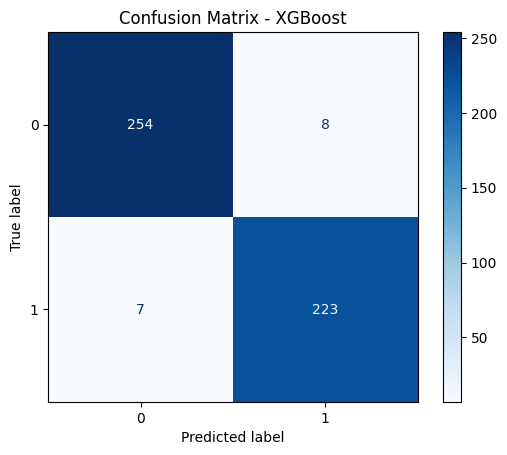

In [42]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()

The confusion matrix shows that the XGBoost model performs very well in detecting phishing websites.  
- It correctly classifies the majority of both legitimate (254) and phishing (223) websites.  
- Only 8 legitimate sites were wrongly flagged as phishing (false positives).  
- Only 7 phishing sites were missed and classified as legitimate (false negatives).  

*This indicates a strong balance between **precision** and **recall**, making the model reliable for real-world use.*

### 2. Feature importance

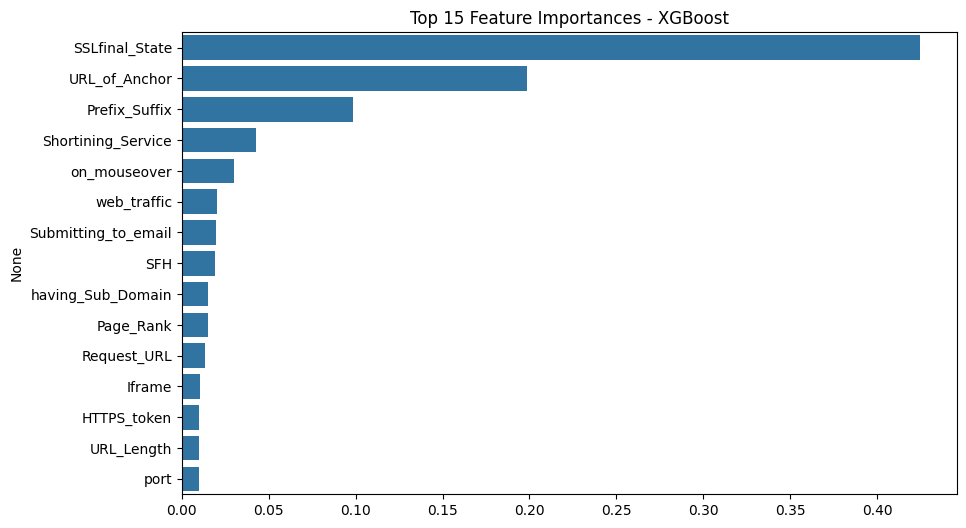

In [43]:
importances = xgb.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()

### 3. Hyperparameter tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

# Base model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# RandomizedSearch
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,  # number of random combinations to try
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Refit the model with best parameters
best_xgb = random_search.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Best cross-validation score: 0.9623238477640047


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:25:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [45]:
best_xgb = XGBClassifier(
    subsample=0.6,
    reg_lambda=1.5,
    reg_alpha=0,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.2,
    gamma=0,
    colsample_bytree=1.0,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)
print("Test Accuracy:", np.round(accuracy_score(y_test, y_pred),3))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:25:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.963


### **Summary**

---



The project successfully developed an **XGBoost Classifier** that achieved approximately **97% accuracy** in detecting phishing websites. This model was chosen for its superior performance and balanced precision and recall, demonstrating its reliability.